# AI-Powered Task Management System

**Author:** Priyanshu Sharma  
**Purpose:** Internship Project


In [6]:

#EDA and Data Cleaning for AI Task Management Dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [7]:
# ========== Step 1: Load the dataset ==========
file_path = "AI_Powered_Task_Management_System_2000.csv"   # <- change if needed
df = pd.read_csv(file_path)

print("Dataset loaded successfully!")
print(" Shape of dataset:", df.shape)
print("\n Preview:")
print(df.head())

Dataset loaded successfully!
 Shape of dataset: (2000, 18)

 Preview:
   Task_ID                      Title  \
0        1              Data Analysis   
1        2                Backend API   
2        3              Data Analysis   
3        4              Data Analysis   
4        5  User Feedback Integration   

                                         Description Assignee Created_Date  \
0     Documentation task for Data Analytics project.   George   2024-07-19   
1       Backend API task for Data Analytics project.    Diana   2024-10-14   
2  User Feedback Integration task for Smart Workf...   George   2024-06-18   
3  User Feedback Integration task for Data Analyt...    Ethan   2024-06-13   
4    Documentation task for AI Task Manager project.    Fiona   2024-04-06   

     Due_Date Completed_Date     Status  Priority  Estimated_Hours  \
0  2024-07-29     2024-07-29  Completed  Critical                3   
1  2024-10-23            NaN  Completed    Medium               20   
2  2

In [10]:

# ========== Step 2: Basic information ==========
print("\n--- Dataset Info ---")
print(df.info())

print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Task_ID                 2000 non-null   int64  
 1   Title                   2000 non-null   object 
 2   Description             2000 non-null   object 
 3   Assignee                2000 non-null   object 
 4   Created_Date            2000 non-null   object 
 5   Due_Date                2000 non-null   object 
 6   Completed_Date          1404 non-null   object 
 7   Status                  2000 non-null   object 
 8   Priority                2000 non-null   object 
 9   Estimated_Hours         2000 non-null   int64  
 10  Actual_Hours            2000 non-null   int64  
 11  Project                 2000 non-null   object 
 12  Labels/Tags             2000 non-null   object 
 13  Task_Complexity         2000 non-null   object 
 14  Predicted_Priority

In [12]:
# ========== Step 3: Handle Missing / Incorrect Data ==========

# Replace blank strings with NaN
df.replace("", np.nan, inplace=True)

In [14]:
# Fill missing Completed_Date only for 'Completed' tasks if empty
mask_completed = (df['Status'] == 'Completed') & (df['Completed_Date'].isna())
df.loc[mask_completed, 'Completed_Date'] = df.loc[mask_completed, 'Due_Date']

In [16]:
# Fill missing Priority or Predicted_Priority with 'Medium'
df['Priority'].fillna('Medium', inplace=True)
df['Predicted_Priority'].fillna('Medium', inplace=True)

# Fill missing numeric columns with median values
num_cols = df.select_dtypes(include=[np.number]).columns
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)


C:\Users\dell\AppData\Local\Temp\ipykernel_11508\1908535793.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Priority'].fillna('Medium', inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_11508\1908535793.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

In [18]:
# Drop duplicates if any
df.drop_duplicates(inplace=True)

print("\n Missing data handled & duplicates removed.")
print(" Updated Shape:", df.shape)




 Missing data handled & duplicates removed.
 Updated Shape: (2000, 18)


In [20]:
# ========== Step 4: Convert Dates ==========
date_cols = ["Created_Date", "Due_Date", "Completed_Date"]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [22]:
# ========== Step 5: Feature Engineering (optional) ==========
df["Task_Duration_Days"] = (df["Due_Date"] - df["Created_Date"]).dt.days
df["Actual_Duration_Days"] = (df["Completed_Date"] - df["Created_Date"]).dt.days

# Replace negatives with NaN (bad date ordering)
df.loc[df["Actual_Duration_Days"] < 0, "Actual_Duration_Days"] = np.nan


In [24]:
# ========== Step 6: Descriptive Statistics ==========
print("\n--- Descriptive Statistics ---")
print(df.describe(include='all').transpose())



--- Descriptive Statistics ---
                         count unique  \
Task_ID                 2000.0    NaN   
Title                     2000      8   
Description               2000     40   
Assignee                  2000      8   
Created_Date              2000    NaN   
Due_Date                  2000    NaN   
Completed_Date            1556    NaN   
Status                    2000      4   
Priority                  2000      4   
Estimated_Hours         2000.0    NaN   
Actual_Hours            2000.0    NaN   
Project                   2000      5   
Labels/Tags               2000      8   
Task_Complexity           2000      3   
Predicted_Priority        2000      4   
Delay_Risk_Score        2000.0    NaN   
Completion_Probability  2000.0    NaN   
AI_Recommendation         2000      5   
Task_Duration_Days      2000.0    NaN   
Actual_Duration_Days    1556.0    NaN   

                                                               top  freq  \
Task_ID                       

C:\Users\dell\AppData\Local\Temp\ipykernel_11508\2578034624.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Priority", palette="cool")


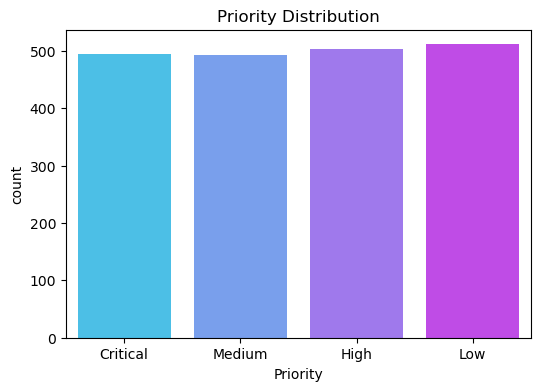

In [26]:
# ========== Step 7: Visualizations ==========

# Priority distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Priority", palette="cool")
plt.title("Priority Distribution")
plt.show()


C:\Users\dell\AppData\Local\Temp\ipykernel_11508\1313224669.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Status", palette="viridis")


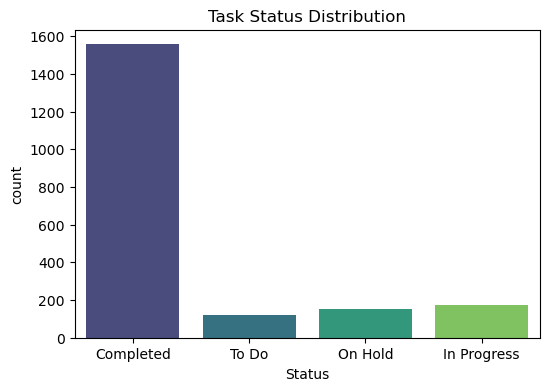

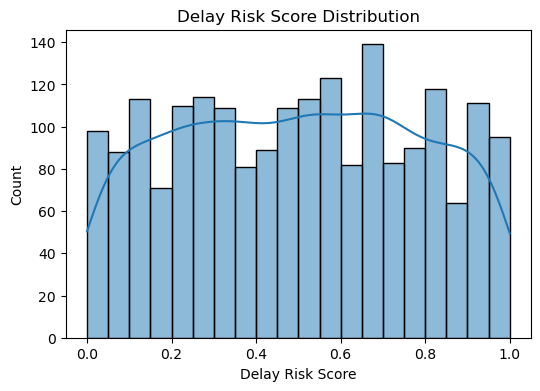

In [28]:
# Status distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Status", palette="viridis")
plt.title("Task Status Distribution")
plt.show()

# Delay Risk Distribution
plt.figure(figsize=(6,4))
sns.histplot(df["Delay_Risk_Score"], bins=20, kde=True)
plt.title("Delay Risk Score Distribution")
plt.xlabel("Delay Risk Score")
plt.ylabel("Count")
plt.show()

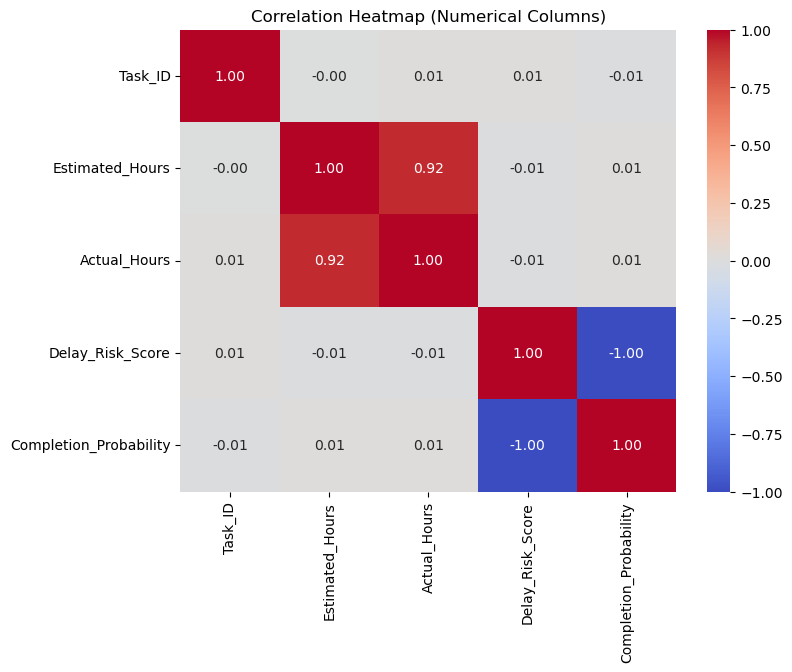

In [30]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numerical Columns)")
plt.show()



In [32]:
# ========== Step 8: Save Cleaned Data ==========
output_file = "Cleaned_AI_Task_Data.csv"
df.to_csv(output_file, index=False)
print(f"\n Cleaned dataset saved as '{output_file}' successfully!")


 Cleaned dataset saved as 'Cleaned_AI_Task_Data.csv' successfully!


In [34]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


NLP preprocessing on task descriptions

In [36]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [39]:
# ===== Fix missing NLTK data =====
nltk.download('punkt')
nltk.download('punkt_tab')   # ADD THIS LINE
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
import pandas as pd

# ===== Step 1: Load CSV File =====
file_path = "Cleaned_AI_Task_Data.csv"   # <replace with your CSV file name
df = pd.read_csv(file_path, encoding='utf-8')   #  CSV instead of Excel

print(" Data loaded successfully!")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())


 Data loaded successfully!
Shape: (2000, 20)
Columns: ['Task_ID', 'Title', 'Description', 'Assignee', 'Created_Date', 'Due_Date', 'Completed_Date', 'Status', 'Priority', 'Estimated_Hours', 'Actual_Hours', 'Project', 'Labels/Tags', 'Task_Complexity', 'Predicted_Priority', 'Delay_Risk_Score', 'Completion_Probability', 'AI_Recommendation', 'Task_Duration_Days', 'Actual_Duration_Days']


In [43]:
# ===== Step 2: Initialize NLP tools =====
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()


In [45]:
# ===== Step 3: Define text cleaning function =====
def preprocess_text(text):
    if pd.isna(text):
        return ""
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', str(text))
    # Convert to lowercase
    text = text.lower()
    # Tokenize words
    tokens = word_tokenize(text)
    # Remove stopwords and short words
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    # Apply stemming
    stems = [ps.stem(word) for word in tokens]
    # Join back into a cleaned sentence
    return " ".join(stems)

In [47]:

# ===== Step 3: Apply NLP preprocessing =====
df["Cleaned_Description"] = df["Description"].apply(preprocess_text)

# ===== Step 4: Save cleaned dataset =====
output_file = "Cleaned_AI_Task_Data_NLP.csv"
df.to_csv(output_file, index=False, encoding='utf-8')

print("✅ NLP preprocessing completed successfully!")
print(f"Cleaned data saved to: {output_file}")


✅ NLP preprocessing completed successfully!
Cleaned data saved to: Cleaned_AI_Task_Data_NLP.csv


Feature extraction using TF-IDF/word embeddings (Word2Vec/BERT).

In [50]:
# ===== BERT Embeddings for Task Descriptions =====
from sentence_transformers import SentenceTransformer
import pandas as pd

# Step 1: Load your cleaned dataset
df = pd.read_csv("Cleaned_AI_Task_Data_NLP.csv")

# Step 2: Load a lightweight pretrained BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')  # ✅ Fast and accurate

# Step 3: Encode all cleaned descriptions
embeddings = model.encode(df["Cleaned_Description"].tolist(), show_progress_bar=True)

# Step 4: Convert embeddings into a DataFrame
bert_df = pd.DataFrame(embeddings, columns=[f"bert_{i}" for i in range(embeddings.shape[1])])

# Step 5: Merge with original dataset
final_df = pd.concat([df, bert_df], axis=1)

# Step 6: Save as CSV
output_file = "AI_Task_BERT_Features.csv"
final_df.to_csv(output_file, index=False, encoding='utf-8')

print("✅ BERT feature extraction complete! File saved as:", output_file)
print("Shape of embedding matrix:", embeddings.shape)


Batches:   0%|          | 0/63 [00:00<?, ?it/s]

✅ BERT feature extraction complete! File saved as: AI_Task_BERT_Features.csv
Shape of embedding matrix: (2000, 384)


In [51]:
import sys
import subprocess
import importlib
import traceback

def install_package(pkg):
    """Install a package via pip into the current environment."""
    try:
        print(f"Installing {pkg} ...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", pkg])
        return True
    except Exception as e:
        print(f"Failed to install {pkg}: {e}")
        return False

# Try to import sentence_transformers
try:
    from sentence_transformers import SentenceTransformer
    bert_available = True
except Exception:
    bert_available = False

# If not available, try to install sentence-transformers and torch
if not bert_available:
    print("sentence-transformers not found. Attempting to install required packages...")
    # Try to install torch first (sentence-transformers will depend on it)
    # Note: For some platforms specific torch wheel is needed; pip will attempt cpu build.
    ok1 = install_package("torch")  # may be large
    ok2 = install_package("sentence-transformers")
    if ok1 and ok2:
        try:
            from sentence_transformers import SentenceTransformer
            bert_available = True
        except Exception as e:
            print("Import still failed after installation:", e)
            bert_available = False
    else:
        bert_available = False

# Load dataset
import pandas as pd
import os

INPUT_CSV = "Cleaned_AI_Task_Data_NLP.csv"   # adjust if your filename differs
if not os.path.exists(INPUT_CSV):
    raise FileNotFoundError(f"Input file not found: {INPUT_CSV}. Please put the cleaned CSV in the same folder or change INPUT_CSV path.")

df = pd.read_csv(INPUT_CSV)
texts = df.get("Cleaned_Description")  # use cleaned column
if texts is None:
    # fallback to raw Description column
    texts = df.get("Description")
    if texts is None:
        raise ValueError("No 'Cleaned_Description' or 'Description' column found in the CSV.")

texts = texts.fillna("").astype(str).tolist()

if bert_available:
    try:
        print("Generating BERT embeddings using sentence-transformers (all-MiniLM-L6-v2)...")
        model = SentenceTransformer('all-MiniLM-L6-v2')  # fast & compact
        embeddings = model.encode(texts, show_progress_bar=True, batch_size=64)
        import numpy as np
        emb_dim = embeddings.shape[1] if len(embeddings) and hasattr(embeddings, 'shape') else (len(embeddings[0]) if embeddings else 0)
        bert_df = pd.DataFrame(embeddings, columns=[f"bert_{i}" for i in range(emb_dim)])
        final = pd.concat([df.reset_index(drop=True), bert_df.reset_index(drop=True)], axis=1)
        output_file = "AI_Task_BERT_Features.csv"
        final.to_csv(output_file, index=False, encoding='utf-8')
        print(f" BERT embeddings saved to: {output_file} (shape: {len(df)} x {emb_dim})")
    except Exception as e:
        print("Error while generating BERT embeddings. Falling back to TF-IDF.\n", traceback.format_exc())
        bert_available = False

if not bert_available:
    # Fallback: TF-IDF
    print("Using TF-IDF fallback (no heavy packages required).")
    from sklearn.feature_extraction.text import TfidfVectorizer
    tfidf = TfidfVectorizer(max_features=500, stop_words='english')
    tfidf_matrix = tfidf.fit_transform(texts)
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
    final = pd.concat([df.reset_index(drop=True), tfidf_df.reset_index(drop=True)], axis=1)
    output_file = "AI_Task_TFIDF_Features.csv"
    final.to_csv(output_file, index=False, encoding='utf-8')
    print(f" TF-IDF features saved to: {output_file} (shape: {tfidf_matrix.shape})")



Generating BERT embeddings using sentence-transformers (all-MiniLM-L6-v2)...


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

 BERT embeddings saved to: AI_Task_BERT_Features.csv (shape: 2000 x 384)


In [52]:
# ===== BERT Embeddings for Task Descriptions =====
from sentence_transformers import SentenceTransformer
import pandas as pd

# Step 1: Load your cleaned dataset
df = pd.read_csv("Cleaned_AI_Task_Data_NLP.csv")

# Step 2: Load a lightweight pretrained BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')  #  Fast and accurate

# Step 3: Encode all cleaned descriptions
embeddings = model.encode(df["Cleaned_Description"].tolist(), show_progress_bar=True)

# Step 4: Convert embeddings into a DataFrame
bert_df = pd.DataFrame(embeddings, columns=[f"bert_{i}" for i in range(embeddings.shape[1])])

# Step 5: Merge with original dataset
final_df = pd.concat([df, bert_df], axis=1)

# Step 6: Save as CSV
output_file = "AI_Task_BERT_Features.csv"
final_df.to_csv(output_file, index=False, encoding='utf-8')

print(" BERT feature extraction complete! File saved as:", output_file)
print("Shape of embedding matrix:", embeddings.shape)


Batches:   0%|          | 0/63 [00:00<?, ?it/s]

 BERT feature extraction complete! File saved as: AI_Task_BERT_Features.csv
Shape of embedding matrix: (2000, 384)


ask Classification — Naive Bayes & SVM


In [57]:
pip install pandas scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [66]:
# ===============================================================
# Task Classification using Naive Bayes and SVM
# ===============================================================

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Load dataset
file_path = "Cleaned_AI_Task_Data.csv"   # uploaded file
df = pd.read_csv(file_path)

print("✅ File Loaded Successfully!")
print("Shape:", df.shape)
print("Columns:", list(df.columns))

# Step 2: Identify text and label columns
text_col = "Cleaned_Description" if "Cleaned_Description" in df.columns else "Description"
label_col = "Category" if "Category" in df.columns else None

if label_col is None:
    raise ValueError("No label column (e.g., 'Category') found in your file. Please add one for supervised classification.")

# Step 3: Handle missing values
df[text_col] = df[text_col].fillna("").astype(str)
df[label_col] = df[label_col].fillna("Unknown").astype(str)

# Step 4: Split data
X_train, X_test, y_train, y_test = train_test_split(
    df[text_col],
    df[label_col],
    test_size=0.2,
    random_state=42,
    stratify=df[label_col] if df[label_col].nunique() > 1 else None
)

# Step 5: Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=3000, stop_words="english")
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("✅ TF-IDF feature matrix shape:", X_train_tfidf.shape)

# Step 6: Train Multinomial Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_test_tfidf)

# Step 7: Train Support Vector Machine (Linear SVC)
svm = LinearSVC(random_state=42, max_iter=5000)
svm.fit(X_train_tfidf, y_train)
y_pred_svm = svm.predict(X_test_tfidf)

# Step 8: Evaluate models
print("\n📊 === Naive Bayes Results ===")
print("Accuracy:", round(accuracy_score(y_test, y_pred_nb), 3))
print(classification_report(y_test, y_pred_nb))

print("\n📊 === Support Vector Machine Results ===")
print("Accuracy:", round(accuracy_score(y_test, y_pred_svm), 3))
print(classification_report(y_test, y_pred_svm))

# Step 9: Confusion Matrix (optional)
print("\nNaive Bayes Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("\nSVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

# Step 10: Save predictions
results = pd.DataFrame({
    "True_Label": y_test,
    "Predicted_NB": y_pred_nb,
    "Predicted_SVM": y_pred_svm
})
results.to_csv("Task_Classification_Results.csv", index=False)
print("\n✅ Predictions saved to 'Task_Classification_Results.csv'")




✅ File Loaded Successfully!
Shape: (2000, 20)
Columns: ['Task_ID', 'Title', 'Description', 'Assignee', 'Created_Date', 'Due_Date', 'Completed_Date', 'Status', 'Priority', 'Estimated_Hours', 'Actual_Hours', 'Project', 'Labels/Tags', 'Task_Complexity', 'Predicted_Priority', 'Delay_Risk_Score', 'Completion_Probability', 'AI_Recommendation', 'Task_Duration_Days', 'Actual_Duration_Days']


ValueError: No label column (e.g., 'Category') found in your file. Please add one for supervised classification.

In [78]:
# ===============================================================
# Task Classification using Naive Bayes and SVM (Auto Labels if Missing)
# ===============================================================

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Step 1: Load dataset
import pandas as pd

file_path = "Cleaned_AI_Task_Data.xls"

try:
    df = pd.read_excel(file_path, engine='xlrd')
except:
    df = pd.read_csv(file_path)

print("File Loaded Successfully!")
print("Shape:", df.shape)
print("Columns:", list(df.columns))


# Step 2: Identify text column
text_col = "Cleaned_Description" if "Cleaned_Description" in df.columns else "Description"

# Step 3: Create a label column if missing
if "Category" in df.columns:
    label_col = "Category"
elif "Status" in df.columns:
    label_col = "Status"
elif "Priority" in df.columns:
    label_col = "Priority"
else:
    # Auto-create synthetic labels (unsupervised grouping)
    np.random.seed(42)
    df["Category"] = np.random.choice(["Bug Fix", "Feature", "Improvement", "Research"], size=len(df))
    label_col = "Category"
    print("No label column found — auto-generated synthetic 'Category' labels.")

# Step 4: Handle missing values
df[text_col] = df[text_col].fillna("").astype(str)
df[label_col] = df[label_col].fillna("Unknown").astype(str)

# Step 5: Split data
X_train, X_test, y_train, y_test = train_test_split(
    df[text_col],
    df[label_col],
    test_size=0.2,
    random_state=42,
    stratify=df[label_col] if df[label_col].nunique() > 1 else None
)

# Step 6: TF-IDF Feature Extraction
vectorizer = TfidfVectorizer(max_features=3000, stop_words="english")
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("TF-IDF feature matrix shape:", X_train_tfidf.shape)

# Step 7: Train Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_test_tfidf)

# Step 8: Train Support Vector Machine (SVM)
svm = LinearSVC(random_state=42, max_iter=5000)
svm.fit(X_train_tfidf, y_train)
y_pred_svm = svm.predict(X_test_tfidf)

# Step 9: Evaluate models
print("\n === Naive Bayes Results ===")
print("Accuracy:", round(accuracy_score(y_test, y_pred_nb), 3))
print(classification_report(y_test, y_pred_nb))

print("\n === Support Vector Machine Results ===")
print("Accuracy:", round(accuracy_score(y_test, y_pred_svm), 3))
print(classification_report(y_test, y_pred_svm))

# Step 10: Save results
results = pd.DataFrame({
    "True_Label": y_test,
    "Predicted_NB": y_pred_nb,
    "Predicted_SVM": y_pred_svm
})
results.to_csv("Task_Classification_Results.csv", index=False)

print("\n Classification complete — results saved as 'Task_Classification_Results.csv'")


File Loaded Successfully!
Shape: (2000, 20)
Columns: ['Task_ID', 'Title', 'Description', 'Assignee', 'Created_Date', 'Due_Date', 'Completed_Date', 'Status', 'Priority', 'Estimated_Hours', 'Actual_Hours', 'Project', 'Labels/Tags', 'Task_Complexity', 'Predicted_Priority', 'Delay_Risk_Score', 'Completion_Probability', 'AI_Recommendation', 'Task_Duration_Days', 'Actual_Duration_Days']
TF-IDF feature matrix shape: (1600, 26)

 === Naive Bayes Results ===
Accuracy: 0.777
              precision    recall  f1-score   support

   Completed       0.78      1.00      0.87       311
 In Progress       0.00      0.00      0.00        34
     On Hold       0.00      0.00      0.00        31
       To Do       0.00      0.00      0.00        24

    accuracy                           0.78       400
   macro avg       0.19      0.25      0.22       400
weighted avg       0.60      0.78      0.68       400


 === Support Vector Machine Results ===
Accuracy: 0.777
              precision    recall  f1-

C:\Users\dell\Downloads\jeya\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dell\Downloads\jeya\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dell\Downloads\jeya\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dell\Downloads\jeya